In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#Importing the CSV File and checking out the columns

df = pd.read_csv('C:/Users/navee/Downloads/ML/CSV/CSV Files/games.csv')

df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [3]:
#Dropping columns that are not useful for our analysis

df = df.drop(['About the game', 'Reviews', 'Website', 'Support url', 'Support email', 
              'Metacritic url', 'Notes', 'Screenshots', 'Movies'], axis = 'columns')

In [4]:
#Identifying total null values in each column

df.isnull().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
Supported languages               0
Full audio languages              0
Header image                      0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Score rank                    85059
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     3586
Publishers                     3834
Categories                  

In [5]:
#Dealing with null values

df[['Developers','Publishers','Categories','Genres', 'Tags', 'Name']] = df[['Developers','Publishers',
                                                                'Categories','Genres', 'Tags', 'Name']].fillna('Not Available')
df['Score rank'] = df['Score rank'].fillna(0)

In [6]:
#Finding out the release year and putting it in a new column for analysis

df['Year'] = df['Release date'].str.split(',', n = 1).str[1]
df = df.drop('Release date', axis = 'columns')

In [7]:
#Identifying top genres available

df['Genres'] = df['Genres'].str.replace('[\,]', ' ', regex=True)
df['Genres'] = df['Genres'].str.title()
top_gen = Counter(" ".join(df["Genres"]).split()).most_common(13)
top_gen

[('Indie', 56932),
 ('Casual', 34210),
 ('Action', 33810),
 ('Adventure', 31452),
 ('Simulation', 16148),
 ('Strategy', 15603),
 ('Rpg', 14441),
 ('Early', 10404),
 ('Access', 10404),
 ('Free', 6631),
 ('To', 6631),
 ('Play', 6631),
 ('Sports', 3790)]

In [8]:
#Preparing the data for plotting

genres = [x[0] for x in top_gen]
values = [x[1] for x in top_gen]

del values[8:11]
del genres[8:11]

genres[7] = 'Early Access'
genres[8] = 'Free to Play'

print(values,genres)

[56932, 34210, 33810, 31452, 16148, 15603, 14441, 10404, 6631, 3790] ['Indie', 'Casual', 'Action', 'Adventure', 'Simulation', 'Strategy', 'Rpg', 'Early Access', 'Free to Play', 'Sports']


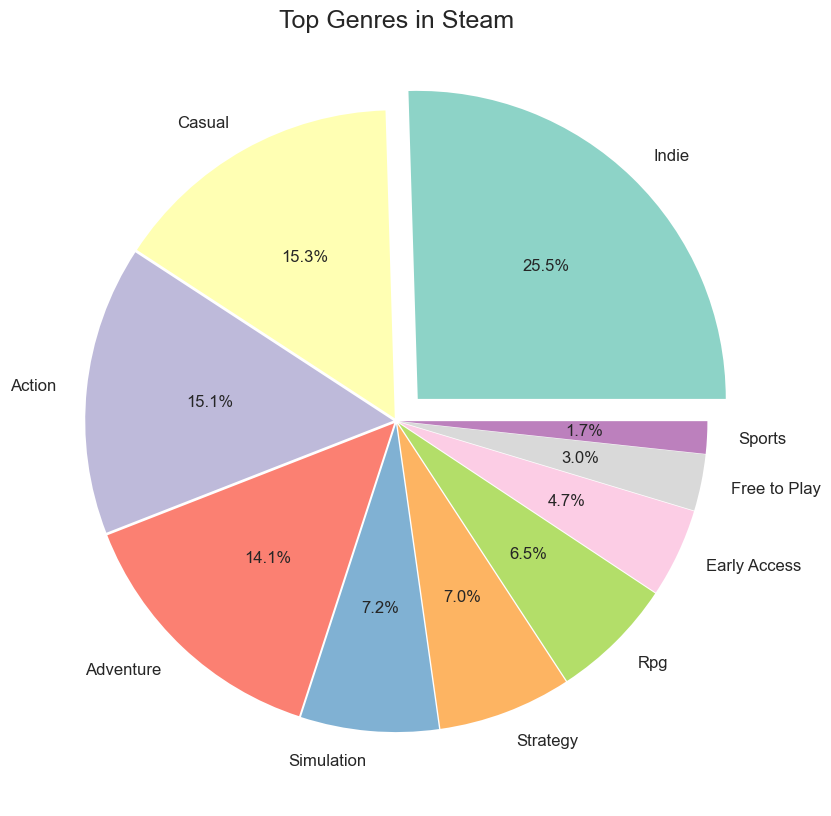

In [9]:
#Plotting a Pie Chart

plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(values, labels = genres, 
       textprops={'size': 12}, explode=(0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01),
       colors=sns.color_palette('Set3'),
       autopct='%.1f%%')
ax.set_title("Top Genres in Steam", fontsize=18);

In [10]:
#Finding ratio of positive and negative reviews for top publishers

df1 = df[['Publishers', 'Positive', 'Negative']]
df1 = df1.groupby('Publishers').sum().sort_values(by = 'Positive', ascending = False).reset_index().head(10)
df1

,Publishers,Positive,Negative
0,Valve,11092767,1246814
1,Ubisoft,3669254,735954
2,Bethesda Softworks,2057709,315276
3,Electronic Arts,1861001,443862
4,Rockstar Games,1764218,304783
5,Xbox Game Studios,1443435,189288
6,"KRAFTON, Inc.",1164126,903306
7,CD PROJEKT RED,1042656,161581
8,Paradox Interactive,1003572,147266
9,Re-Logic,965604,21303


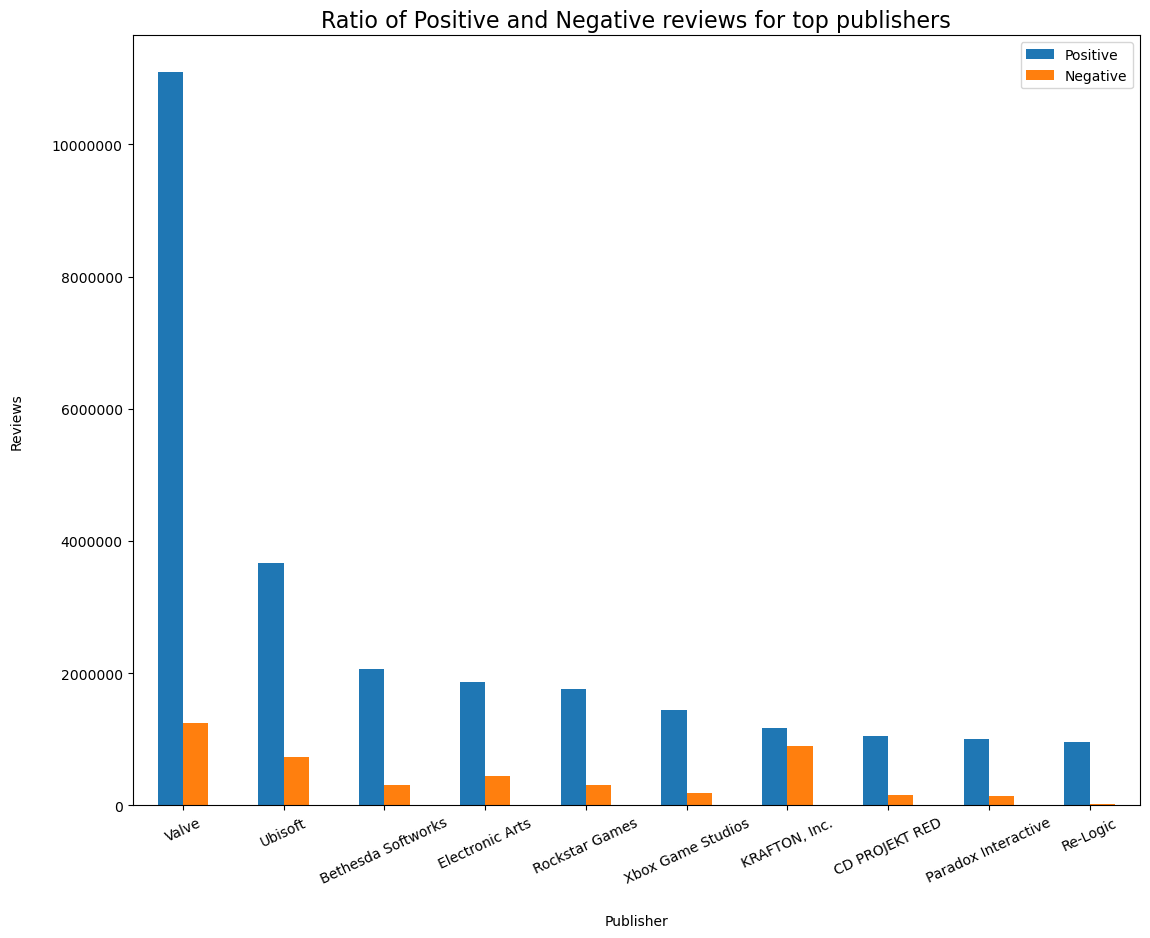

In [11]:
#Plotting a graph to find the ratio of Positive and Negative reviews for top publishers

plt.style.use("seaborn-v0_8")

plt.rcdefaults()
fig, ax = plt.subplots(figsize = (13,10))
plt.ticklabel_format(style = 'plain')
df1.plot.bar(x = 'Publishers', y = ['Positive', 'Negative'], rot = 25, ax = ax)
ax.set_title("Ratio of Positive and Negative reviews for top publishers", fontsize = 16)
ax.set(xlabel = "Publisher", ylabel = "Reviews");
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20


In [12]:
#Identifying publishers with the highest playtime

df2 = df[['Publishers', 'Average playtime forever']]
df2 = df2.groupby('Publishers').mean().round(2).sort_values(by = 'Average playtime forever', 
      ascending = False).reset_index().head(10)
df2['Publishers'] = df2['Publishers'].replace('英雄互娱', 'Hero Games')
df2

,Publishers,Average playtime forever
0,JoyMoe Interactive Entertainment Limited,90351.00
1,Albatros Softworks,76068.00
2,Global Delight Technologies Pvt. Ltd.,48575.67
3,Studio Evil,34337.50
4,Hero Games,33343.00
5,Rutony Studio,27393.00
6,Nexcentric Games,26827.00
7,"SOFTSTAR TECHNOLOGY (SHANGHAI) CO., LTD",23147.00
8,Smilegate West,22808.00
9,Dragonrise Games,21657.67


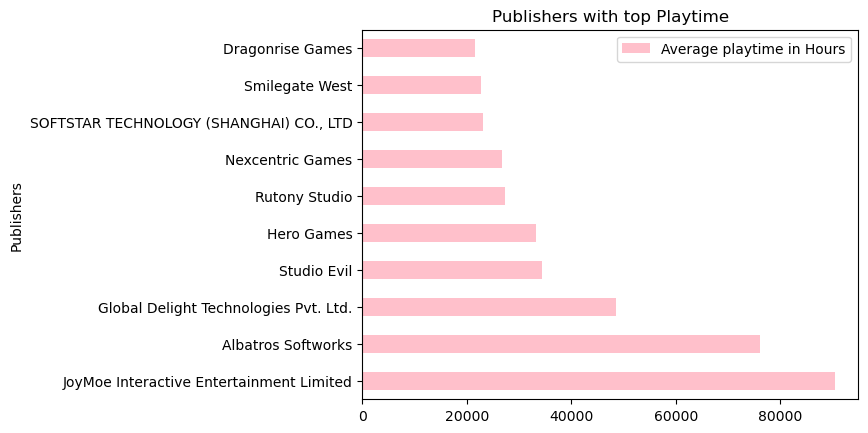

In [13]:
#Plotting a bar graph

plt.rcdefaults()
df2.plot.barh(x = 'Publishers', y = 'Average playtime forever', color='pink')
plt.title("Publishers with top Playtime")
plt.legend(['Average playtime in Hours']);